Estimated Crop Field Angle OLS: 44.38702510610566
Estimated Crop Field Angle TLS: 67.97272330198257
Estimated Crop Field Angle (RANSAC): 54.542859459202916


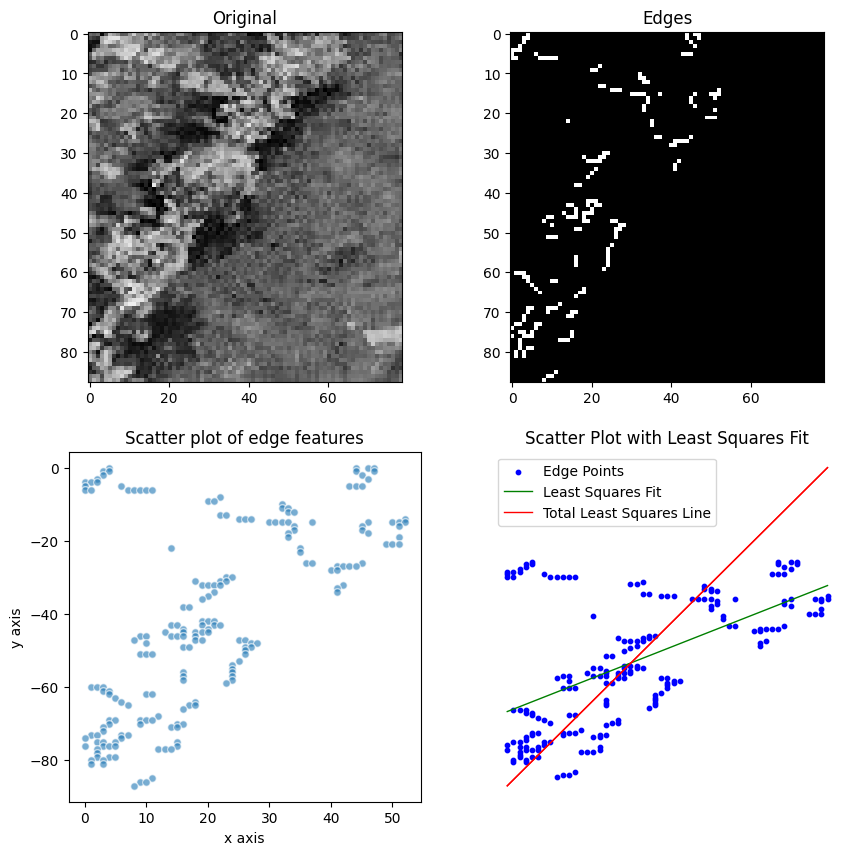

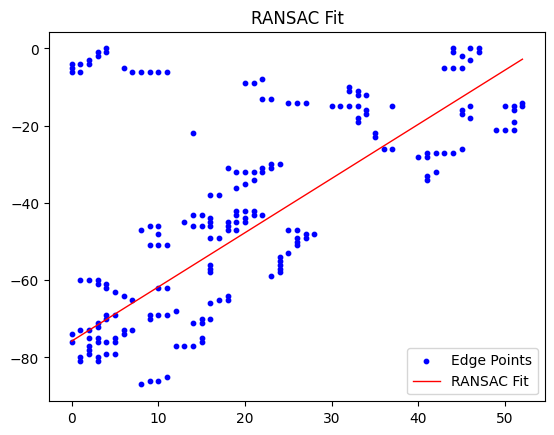

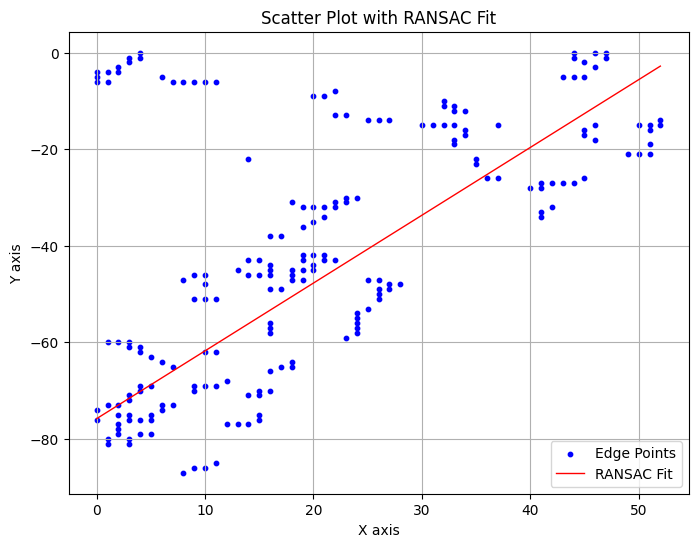

In [59]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import scipy.odr as odr
from sklearn.linear_model import RANSACRegressor


im = cv.imread ('crop_field_cropped.jpg', cv.IMREAD_GRAYSCALE)
assert im is not None
im = cv.cvtColor(im, cv.COLOR_BGR2RGB)

edges = cv.Canny(im, 550, 690)

indices = np.where(edges != [0])
x = indices[1]
y = -indices[0]


fig, ax = plt.subplots(2,2,figsize =(10,10))
ax[0,0].imshow(im)
ax[0,0].set_title('Original')
ax[0,1].imshow(edges,cmap = 'gray')
ax[0,1].set_title('Edges')
#plt.show()

#Q2
# Scatter plot in the second subplot (ax[1])
ax[1,0].scatter(x, y, alpha=0.6, edgecolors='w', s=30)
ax[1,0].set_title('Scatter plot of edge features')
ax[1,0].set_xlabel('x axis')
ax[1,0].set_ylabel('y axis')
# Inverting y-axis to match the image coordinate system
ax[1, 1].axis('off')

#Q3
# Calculate least squares fit line
m, c = np.polyfit(x, y, 1)  # Fit a linear model (degree = 1)
x_coords = np.array([min(x), max(x)])
y_coords = m * x_coords + c

plt.scatter(x,y,c='b',marker='o',s=10,label='Edge Points')  # Change marker color to blue, marker style to circle, and marker size to 10
plt.plot(x_coords,y_coords, color='green', linewidth=1, label='Least Squares Fit')  # Plot the least squares fit line in green
plt.plot(x_coords2, y_coords2, color='red',linewidth = 1, label='Total Least Squares Line')
plt.xlabel('X')  # Label for Y axis
plt.ylabel('Y')  # Label for X axis
plt.title('Scatter Plot with Least Squares Fit')  # Title for the plot
plt.legend()  # Show the legend


# Question 4 
# Calculating Angle
angle = np.arctan(m) 
deg = np.rad2deg(angle) 
print("Estimated Crop Field Angle OLS:", deg)

# Question 5 
# No, as the gradient doesn't seem to take into consideration the scale between the y axis and x axis

# Question 6 
# Total Least Squares
def linear_model(params, x):
    m2, c2 = params
    y = m2 * x + c2
    return y
linear_odr = odr.Model(linear_model)
data = odr.RealData(x, y)
guess = [m, c]
odr_obj = odr.ODR(data, linear_odr, beta0=guess)

output = odr_obj.run()

m2 = output.beta[0]  
c2 = output.beta[1]   
sd_m = output.sd_beta[0]  
sd_c = output.sd_beta[1]  

x_coords2 = np.array([min(x), max(x)])
y_coords2 = m2 * x_coords2 + c2

plt.plot(x_coords2, y_coords2, color='red',linewidth = 1, label='Total Least Squares Line')

# Question 7 
# Angles
angle = np.arctan(m2) 
deg = np.rad2deg(angle) 
print("Estimated Crop Field Angle TLS:", deg)

# Question 8 
# I believe this angle is more correct than the one calculated with OLS


# Question 9

# Stack the points for RANSAC input
points = np.column_stack((x, y))

# Initialize RANSAC regressor
ransac = RANSACRegressor(random_state=0)
ransac.fit(points[:, 0].reshape(-1, 1), points[:, 1])

# Extract model parameters (slope and intercept)
m_ransac = ransac.estimator_.coef_[0]  # Direct access without indexing
c_ransac = ransac.estimator_.intercept_  # Direct access without indexing

# Compute angle from the slope
angle_ransac = np.arctan(m_ransac)
deg_ransac = np.rad2deg(angle_ransac)
print("Estimated Crop Field Angle (RANSAC):", deg_ransac)

# Plot the original image, edges, and RANSAC fit
fig, ax = plt.subplots()
#ax.imshow(im, cmap='gray')
ax.set_title('RANSAC Fit')
ax.scatter(x, y, c='b', marker='o', s=10, label='Edge Points')
x_coords = np.array([min(x), max(x)])
y_coords_ransac = m_ransac * x_coords + c_ransac
ax.plot(x_coords, y_coords_ransac, color='red', linewidth=1, label='RANSAC Fit')
ax.legend()


# Question 10

# Generate points for plotting the line
x_coords = np.linspace(min(x), max(x), 100)
y_coords_ransac = m_ransac * x_coords + c_ransac

# Plot the scatter plot with the estimated line
plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='b', marker='o', s=10, label='Edge Points')
plt.plot(x_coords, y_coords_ransac, color='red', linewidth=1, label='RANSAC Fit')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Scatter Plot with RANSAC Fit')
plt.legend()
plt.grid(True)
plt.show()

# Question 11




plt.show()

